# View Effect of Prompts on Output

In [44]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from IPython.display import clear_output
from matplotlib import pyplot as plt
import numpy as np
np.set_printoptions(precision=2) 
np.set_printoptions(linewidth=160)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w", 'bbox_inches': 'tight'}

from matplotlib.font_manager import FontProperties


import pickle
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DejaVu Sans'
from IPython.display import Markdown


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [45]:
import json

# Open the JSON file
with open('../test_prompt.json') as file:
    data = json.load(file)

# Extract the variables
open_area = data['open_area_scores']
clearance = data['clearance_scores']

In [37]:
# Example Solutions
# Greatest / least open_area and clearance
layouts = [] 
layouts.append(data['named_layouts']['no open_area, no clearance'])
layouts.append(data['named_layouts']['no open_area, a lot of clearance'])
layouts.append(data['named_layouts']['a lot of open_area, no clearance'])
layouts.append(data['named_layouts']['a lot of open_area, a lot of clearance'])

In [ ]:
## -- Viewing Single Solutions in Dataset -- #

# from tile_gen.fos.converter import Converter
# converter = Converter(load_path='/home/gaiera/Code/NZB/tile_gen/data/converter.json')

# A = data['named_layouts']['no open_area, no clearance']
# B =np.array(A)
# C = B[0]
# D = converter.named2id(C)
# plt.imshow(D==40)

In [15]:
prompt_open = open_area.keys()
prompt_clearance = clearance.keys()
n_rows = len(prompt_open)
n_cols = len(prompt_clearance)

def add_rectangle_around_box(ax, bp, box_ranges, padding=0.1):
    for i, box in enumerate(bp['boxes']):
        box_coords = np.array([box.get_xdata(), box.get_ydata()]).T
        x_min = -padding + box_coords[0, 0]
        x_max = padding + box_coords[2, 0] 
        y_min = box_ranges[i][0]
        y_max = box_ranges[i][1]
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=1, edgecolor='blue', facecolor='cornflowerblue', alpha=0.2)
        ax.add_patch(rect)
    ax.legend([rect], ["True Threshold"], loc="upper left")
    ax.set_xticklabels

box_open_area = [[130.0, 169.0], [169, 197.0], [197.0, 218.0], [218.0, 230.09]]
box_clearance = [[725, 825.0], [825, 929], [929, 1054], [1054, 1154]]

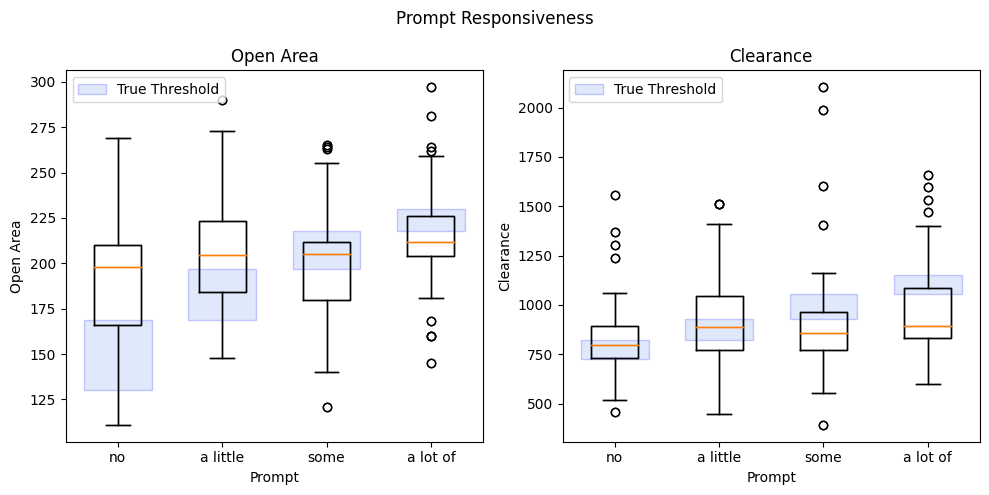

**Prompt Responsiveness:** Each combination of open_area and clearance (4x4) 
             is used 16 times (256 total) with an site with dimensions (28x35).
             Each plot is the results from collected open_area or clearance prompts
             for a total of 64 points (256/4) each. 
             The true threshold is shown in blue -- in a perfect response all results would be in this band.
             *Takeaway*: The model responds to the prompts but are pulled toward middle values.
             These mean values are heavily overrepresented in the training data.
          

In [16]:
import matplotlib.pyplot as plt

# Data
open_area_data = list(open_area.values())
open_area_labels = list(open_area.keys())

clearance_data = list(clearance.values())
clearance_labels = list(clearance.keys())

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Open Area subplot
ax1.boxplot(open_area_data, labels=open_area_labels)
ax1.set_xticklabels(open_area_labels)  # Set x-axis tick labels

bp = ax1.boxplot(open_area_data)
add_rectangle_around_box(ax1, bp, box_open_area)
ax1.set_title("Open Area")
ax1.set_xlabel("Prompt")
ax1.set_ylabel("Open Area")
ax1.set_xticks(range(1, len(open_area_labels) + 1))
ax1.set_xticklabels(open_area_labels)

# Clearance subplot
ax2.boxplot(clearance_data, labels=clearance_labels)
bp = ax2.boxplot(clearance_data)
add_rectangle_around_box(ax2, bp, box_clearance)
ax2.set_title("Clearance")
ax2.set_xlabel("Prompt")
ax2.set_ylabel("Clearance")
ax2.set_xticks(range(1, len(clearance_labels) + 1))
ax2.set_xticklabels(clearance_labels)


# Set super title
fig.suptitle("Prompt Responsiveness")

# Adjust spacing between subplots
fig.tight_layout()

heading = "**Prompt Responsiveness:** "
caption = """Each combination of open_area and clearance (4x4) 
             is used 16 times (256 total) with an site with dimensions (28x35).
             Each plot is the results from collected open_area or clearance prompts
             for a total of 64 points (256/4) each. 
             The true threshold is shown in blue -- in a perfect response all results would be in this band.
             *Takeaway*: The model responds to the prompts but are pulled toward middle values.
             These mean values are heavily overrepresented in the training data.
          """

plt.show()
display(Markdown(heading+caption))


In [17]:
prompt_open = open_area.keys()
prompt_clearance = clearance.keys()
n_rows = len(prompt_area)
n_cols = len(prompt_clearance)

box_open_area = [ [130.0,169.0], [169, 197.0], [197.0, 218.0], [218.0, 230.09] ]
box_clearance = [ [725,825.0], [825,929], [929,1054] , [1054,1154]]
               

# Display Box Plots
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Open Scores
flower_data = [np.array(flower)[j, :, :].flatten() for j in range(n_cols)]
bp = ax[0].boxplot(flower_data)
add_rectangle_around_box(ax[0], bp, box_flower) 
ax[0].set_title("Number of Flowers")
ax[0].set_xlabel("Flower Prompt")
ax[0].set_xticks(range(1, n_rows + 1))
ax[0].set_xticklabels(prompt_flower)
ax[0].set_ylabel("Flowers")

# Clearance Scores
straight_data = [np.array(straight)[:, j, :].flatten() for j in range(n_cols)]
bp = ax[1].boxplot(straight_data)
add_rectangle_around_box(ax[1], bp, box_straight)
ax[1].set_title("Straightness")
ax[1].set_xlabel("Straightness Prompt")
ax[1].set_xticks(range(1, n_cols + 1))
ax[1].set_xticklabels(prompt_straight)
ax[1].set_ylabel("Straightness Score")

heading = "**Prompt Responsiveness:** "
caption = """Each combination of flower and straightness prompts (4x4) 
             is used 16 times (256 total) with an image dimensions (14x100).
             Each plot is the results from collected flower or straightness prompts
             for a total of 64 points (256/4) each. 
             The true threshold is shown in blue -- in a perfect response all results would be in this band.
             *Takeaway*: The model responds to the prompts but are pulled toward middle values.
             These mean values are heavily overrepresented in the training data.
          """

plt.show()
display(Markdown(heading+caption))



NameError: name 'prompt_area' is not defined